# Pandas for Time Series Data Visualization

Time series data is a type of data that is dependent on time and changes with time. For instance, hourly temperature for a specific place changes after every hour and is dependent upon time. 

 You will work with Google Stock Price data from 
th
7 January 2015 to 7  January 2020. The dataset is available 
th
in the resources folder by the name google_data.csv.

In [1]:
import pandas as pd
google_stock = pd.read_csv(r"C:\Users\jaiku\PycharmProjects\Pandas\google_data.csv")
google_stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-06,513.589966,514.761719,499.678131,500.585632,500.585632,2899900
1,2015-01-07,505.611847,505.855164,498.281952,499.727997,499.727997,2065000
2,2015-01-08,496.626526,502.101471,489.655640,501.303680,501.303680,3353500
3,2015-01-09,503.377991,503.537537,493.435272,494.811493,494.811493,2071300
4,2015-01-12,493.584869,494.618011,486.225067,491.201416,491.201416,2326700


If you look at the dataset header, the index column by default is the left-most column. If we plot a line plot, the x-axis will use the index column to plot a line plot

However, we want to plot stock prices with respect to date. To do so, we first need to set the date as the index column. The date column currently contains dates in a string format. 

We first need to convert values in the date column to date format. We can use pd�to_datetime() function for that purpose.

Next, to set the Date column as the index column, we can use the set_index() function, as shown below. Next, we can simply use the line() function and pass the column name to visualize the y parameter.

The following script prints the opening stock prices of Google stock over a period of five years. 

<Axes: xlabel='Date'>

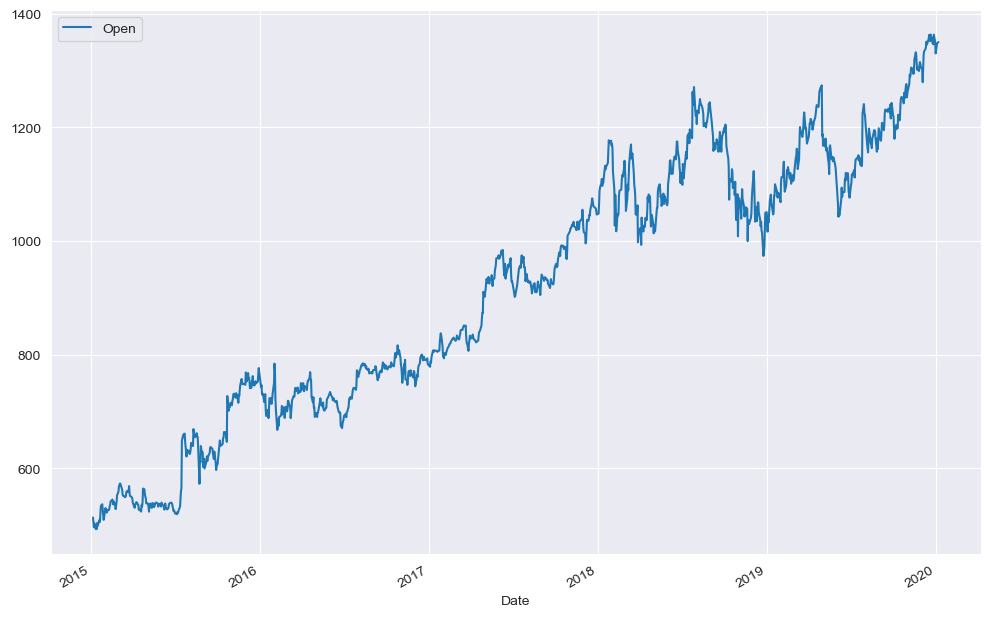

In [2]:
google_stock['Date'] = google_stock['Date'].apply(pd.to_datetime)
google_stock.set_index('Date', inplace=True)
google_stock.plot.line( y='Open', figsize=(12,8))

#  Time Sampling with Pandas

Time sampling refers to grouping data over a certain period of time using an aggregate function such as min, max, count, mean, etc.

To do resampling, you have to use the resample() function. The time frame is passed to the rule attribute of the resample() function. Finally, you have to append the aggregate function at the end of the resample() function. 

The following script shows the average values for all the columns of Google stock data, grouped by year. In the output, you can see five rows since our data set contains five years of Google stock prices. Here, we pass YE as the value for the rule attribute, which refers to yearly data.

In [5]:
google_stock.resample(rule='YE').mean()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-12-31,602.676217,608.091468,596.722047,602.678382,602.678382,2.071960e+06
2016-12-31,743.732459,749.421629,737.597905,743.486707,743.486707,1.832266e+06
2017-12-31,921.121193,926.898963,915.331412,921.780837,921.780837,1.476514e+06
2018-12-31,1113.554101,1125.777606,1101.001658,1113.225134,1113.225134,1.741965e+06
2019-12-31,1187.009821,1196.787599,1178.523734,1188.393057,1188.393057,1.414085e+06
2020-12-31,1346.470011,1379.046672,1345.697998,1374.079997,1374.079997,1.441767e+06


Similarly, to plot the monthly mean values for all the columns in the Google stock dataset, you will need to pass ME as a value for the rule attribute, as shown below.

In [7]:
google_stock.resample(rule='ME').mean()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-31,510.388728,515.352041,503.988300,510.248006,510.248006,2.595550e+06
2015-02-28,534.448454,540.111910,530.943141,536.519088,536.519088,1.715495e+06
2015-03-31,558.825290,562.627577,554.057018,558.183871,558.183871,1.756709e+06
2015-04-30,539.966811,543.839108,535.114912,539.304467,539.304467,2.017938e+06
2015-05-31,535.470502,539.167248,530.856650,535.238998,535.238998,1.593295e+06
...,...,...,...,...,...,...
2019-09-30,1217.599005,1228.892249,1209.628491,1220.839520,1220.839520,1.344970e+06
2019-10-31,1230.809995,1242.260774,1223.923043,1232.711744,1232.711744,1.250361e+06
2019-11-30,1302.348492,1311.498956,1296.424707,1304.278992,1304.278992,1.246170e+06


In addition to aggregate values for all the columns, you can resample data with respect to a single column

 For instance, the following script prints the yearly mean values for the opening stock prices of Google stock over a period of five years.

In [8]:
google_stock['Open'].resample('YE').mean()

Date
2015-12-31     602.676217
2016-12-31     743.732459
2017-12-31     921.121193
2018-12-31    1113.554101
2019-12-31    1187.009821
2020-12-31    1346.470011
Freq: YE-DEC, Name: Open, dtype: float64

# Pandas Resampling Rule Codes

| Alias  | Description                      |
|--------|----------------------------------|
| `B`    | Business day frequency          |
| `C`    | Custom business day frequency   |
| `D`    | Calendar day frequency          |
| `W`    | Weekly frequency                |
| `M`    | Month end frequency             |
| `SM`   | Semi-month end frequency (15th and end of month) |
| `BM`   | Business month end frequency    |
| `CBM`  | Custom business month end       |
| `MS`   | Month start frequency           |
| `SMS`  | Semi-month start frequency (1st and 15th) |
| `BMS`  | Business month start frequency  |
| `CBMS` | Custom business month start     |
| `Q`    | Quarter end frequency           |
| `BQ`   | Business quarter end frequency  |
| `QS`   | Quarter start frequency         |
| `BQS`  | Business quarter start frequency |
| `A` or `Y`  | Year end frequency        |
| `BA`   | Business year end frequency     |
| `AS` or `YS` | Year start frequency      |
| `BAS`  | Business year start frequency   |
| `H`    | Hourly frequency                |
| `T` or `min` | Minutely frequency       |
| `S`    | Secondly frequency              |
| `L` or `ms` | Milliseconds              |
| `U` or `us` | Microseconds              |
| `N`    | Nanoseconds                     |

### **Custom Interval Examples**
| Alias  | Description                      |
|--------|----------------------------------|
| `3D`   | Every 3 days                    |
| `2W`   | Every 2 weeks                    |
| `5min` | Every 5 minutes                  |
| `10S`  | Every 10 seconds                 |
| `250ms`| Every 250 milliseconds           |
| `5U`   | Every 5 microseconds             |
| `100N` | Every 100 nanoseconds            |



You can also append plot functions with the resample() function in order to plot the different types of plot based on aggregate values. For instance, the following script plots a bar plot for the opening stock price of Google over a period of five years.

<Axes: xlabel='Date'>

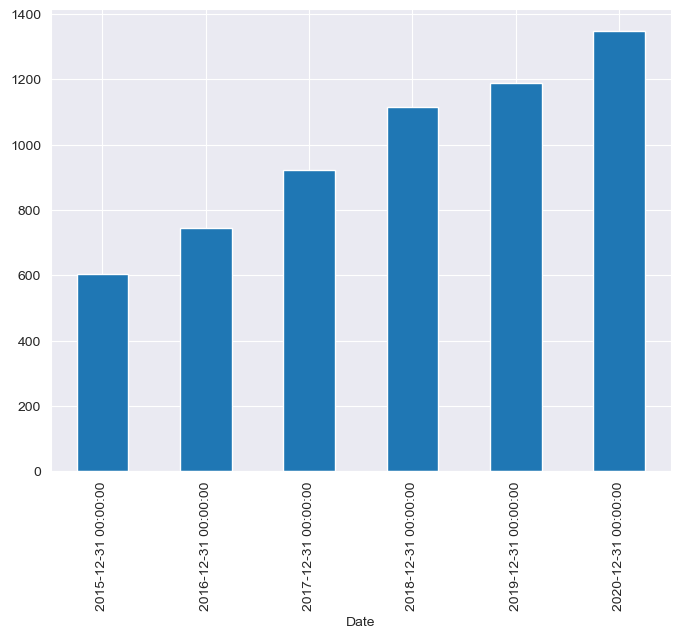

In [10]:
google_stock['Open'].resample('YE').mean().plot(kind='bar', figsize=(8,6))

# Time Shifting with Pandas

Time shifting refers to shifting rows forward or backward. To 
shift rows forward, you can use the shift() function and pass it a positive value. For instance, the following script shifts records three rows ahead and prints the header of the dataset. 

In [11]:
google_stock.shift(3).head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-06,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-07,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-08,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-09,513.589966,514.761719,499.678131,500.585632,500.585632,2899900.0
2015-01-12,505.611847,505.855164,498.281952,499.727997,499.727997,2065000.0


In the same way, you can shift rows backward. To do so, you have to pass a negative value to the shift function.

In [12]:
google_stock.shift(-3).tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-30,1347.859985,1372.5,1345.543945,1360.660034,1360.660034,1186400.0
2019-12-31,1350.000000,1396.5,1350.000000,1394.209961,1394.209961,1732300.0
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-06,NaN,NaN,NaN,NaN,NaN,NaN
